In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [186]:
def omega(J, u):
    return np.sqrt(9*J**2 + 4*J*u + 4*u**2)

lat_dat = np.load("generic-lattice-parameters.npz")
V0_l, tunneling, Us = [lat_dat[x] for x in lat_dat]

#1,1 & 1,-1 pair
UAA = Us * 100.4 / 100.
UAB = Us * 101.333 / 100.
u_Hz = UAA - UAB
J_Hz = 4*tunneling**2 / UAB

##1,-1 & 1,0 pair
#UAA = Us * (100.4 + 100.867) / 2. / 100.
#UAB = Us * 100.4 / 100.
# u_Hz = UAA - UAB
# J_Hz = 4*tunneling**2 / UAB

In [187]:
def ampl(J, u):
    return 2*J*u / omega(J, u)

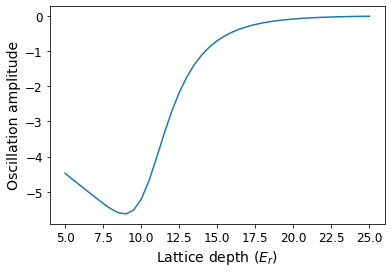

In [194]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.plot(V0_l, ampl(J_Hz, u_Hz))
ax.set_ylabel("Oscillation amplitude", fontsize = 14)
ax.set_xlabel("Lattice depth ($E_r$)", fontsize = 14)
ax.tick_params(labelsize = 12)

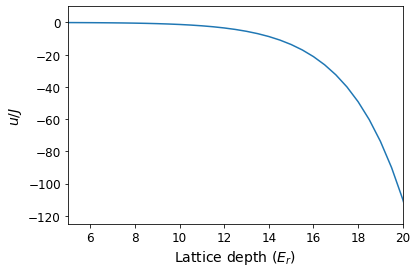

In [206]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.plot(V0_l, u_Hz/J_Hz)
ax.set_xlim([5, 20])
ax.set_ylim([-125, 10])

ax.set_ylabel("$u/J$", fontsize = 14)
ax.set_xlabel("Lattice depth ($E_r$)", fontsize = 14)
ax.tick_params(labelsize = 12)

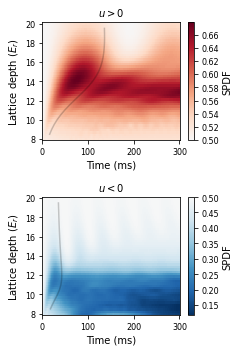

In [185]:
fig, ax = plt.subplots(2, 1, figsize = (3.4, 5))

dat = np.load("spdf-11-10-pair-vary-hold-lattice-8-to-20Er.npz")
V0, time, spdfs = [dat[x] for x in dat]
maxtime = 300.
common_time_axis = np.linspace(0, maxtime, 500)
interpspdf = np.vstack([np.interp(common_time_axis, time[i], spdfs[i]) for i in range(len(V0))])
common_V0_axis = np.linspace(8, 20, 50)
interpspdf = np.vstack([np.interp(common_V0_axis, V0, interpspdf[:, i]) for i in range(len(common_time_axis))]).T

X, Y = np.meshgrid(common_time_axis, common_V0_axis)
divnorm = colors.TwoSlopeNorm(vmin = np.min(interpspdf)*0.99999, vmax = np.max(interpspdf), vcenter = 0.5)
p2 = ax[0].pcolormesh(X, Y, interpspdf, cmap = 'RdBu_r', norm = divnorm, shading = 'auto')
ax[0].set_xlabel(r"Time (ms)", fontsize = 10)
ax[0].set_ylabel(r"Lattice depth ($E_r$)", fontsize = 10)
ax[0].tick_params(labelsize = 8)
ax[0].set_title(r"$u > 0$", fontsize = 10)

#1,-1 & 1,0 pair
UAA = Us * (100.4 + 100.867) / 2. / 100.
UAB = Us * 100.4 / 100.
u_Hz = UAA - UAB
J_Hz = 4*tunneling**2 / UAB
sel = np.logical_and(V0_l < 20, V0_l > 8)
ax[0].plot( 1000. / (np.sqrt(2) * omega(J_Hz[sel], u_Hz[sel])), V0_l[sel], color = 'k', alpha = 0.2 )

cb = fig.colorbar(p2, ax = ax[0])
cb.set_label("SPDF", fontsize = 10)
cb.ax.tick_params(labelsize = 8)

dat = np.load("spdf-11-1m1-pair-vary-hold-lattice-8-to-20Er.npz")

V0, time, spdfs = [dat[x] for x in dat]
maxtime = 300.
common_time_axis = np.linspace(0, maxtime, 500)
interpspdf = np.vstack([np.interp(common_time_axis, time[i], spdfs[i]) for i in range(len(V0))])
common_V0_axis = np.linspace(8, 20, 50)
interpspdf = np.vstack([np.interp(common_V0_axis, V0, interpspdf[:, i]) for i in range(len(common_time_axis))]).T

X, Y = np.meshgrid(common_time_axis, common_V0_axis)
divnorm = colors.TwoSlopeNorm(vmin = np.min(interpspdf), vmax = np.max(interpspdf)*1.000001, vcenter = 0.5)
p2 = ax[1].pcolormesh(X, Y, interpspdf, cmap = 'RdBu_r', norm = divnorm, shading = 'auto')
ax[1].set_xlabel(r"Time (ms)", fontsize = 10)
ax[1].set_ylabel(r"Lattice depth ($E_r$)", fontsize = 10)
ax[1].tick_params(labelsize = 8)
ax[1].set_title(r"$u < 0$", fontsize = 10)

#1,1 & 1,-1 pair
UAA = Us * 100.4 / 100.
UAB = Us * 101.333 / 100.
u_Hz = UAA - UAB
J_Hz = 4*tunneling**2 / UAB
sel = np.logical_and(V0_l < 20, V0_l > 8)
ax[1].plot( 1000. / (np.sqrt(2) * omega(J_Hz[sel], u_Hz[sel])), V0_l[sel], color = 'k', alpha = 0.2 )

cb = fig.colorbar(p2, ax = ax[1])
cb.set_label("SPDF", fontsize = 10)
cb.ax.tick_params(labelsize = 8)

plt.tight_layout()

fname = "mps-heatmaps-realistic-lattice-parameters"
plt.savefig(fname + ".pdf")

In [174]:
ind = np.argmin(np.abs(V0_l - 14))
tunneling[ind]

16.280956380438734